<a href="https://colab.research.google.com/github/badgujjarajay/Geeksman_AISquad_Project1_AJAY/blob/master/fruits_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link of G-Drive folder. [Click Here](https://drive.google.com/drive/folders/1l0s8ObwvRZG8TpfzT3Z1VSNaJ6vRP0XQ?usp=sharing)

https://drive.google.com/drive/folders/1l0s8ObwvRZG8TpfzT3Z1VSNaJ6vRP0XQ

# **Prediction using trained Model.**

In this notebook we will be doing three tasks (predictions using the trained model).
1. Prediction using URL of image.
2. Predictions of images uploaded from the device.
3. Downloading random images and make a video with their prediction result on them. 

**Import all required libraries.**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


**Downloading the model trained in Notebook 2.**

[Link](https://github.com/badgujjarajay/Geeksman_AISquad_Project1_AJAY/blob/master/fruits_training.ipynb) of Notebook 2.

[Link](https://docs.google.com/uc?export=download&confirm=cmKn&id=1-3gjqhjQ8KkJJn0LCQWahQkCdZtnreiM) of export.pkl of trained model.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-3gjqhjQ8KkJJn0LCQWahQkCdZtnreiM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-3gjqhjQ8KkJJn0LCQWahQkCdZtnreiM" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-08-02 19:18:31--  https://docs.google.com/uc?export=download&confirm=cmKn&id=1-3gjqhjQ8KkJJn0LCQWahQkCdZtnreiM
Resolving docs.google.com (docs.google.com)... 172.217.203.113, 172.217.203.102, 172.217.203.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2c-docs.googleusercontent.com/docs/securesc/ci146orgbsv4t4cbmps2errrkt1bkk17/g7692klmtd8k49ed6kemkkqefi5d29pi/1596395850000/06045655936260487161/05176712866894346545Z/1-3gjqhjQ8KkJJn0LCQWahQkCdZtnreiM?e=download [following]
--2020-08-02 19:18:31--  https://doc-08-2c-docs.googleusercontent.com/docs/securesc/ci146orgbsv4t4cbmps2errrkt1bkk17/g7692klmtd8k49ed6kemkkqefi5d29pi/1596395850000/06045655936260487161/05176712866894346545Z/1-3gjqhjQ8KkJJn0LCQWahQkCdZtnreiM?e=download
Resolving doc-08-2c-docs.googleusercontent.com (doc-08-2c-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Conne

**Loading the trained model in predictor variable.**

In [3]:
predictor = load_learner('/content/')

**Defining a predictor function which takes path of the image as a parameter and return its class (name of fruit in the image).**

In [4]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

# Prediction using URL

Enter the URL of the image to get its class.

Enter URL: https://agfstorage.blob.core.windows.net/misc/FP_com/2020/01/24/Aman.jpg
--2020-08-02 19:19:00--  https://agfstorage.blob.core.windows.net/misc/FP_com/2020/01/24/Aman.jpg
Resolving agfstorage.blob.core.windows.net (agfstorage.blob.core.windows.net)... 52.239.141.36
Connecting to agfstorage.blob.core.windows.net (agfstorage.blob.core.windows.net)|52.239.141.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71858 (70K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  70.17K   373KB/s    in 0.2s    

2020-08-02 19:19:00 (373 KB/s) - ‘test.jpg’ saved [71858/71858]



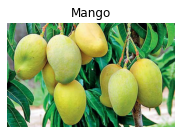

In [5]:
url = input("Enter URL: ")
!wget -O "test.jpg" {url}

img = open_image('test.jpg')
title = str(my_predictor('test.jpg'))
img.show(title=title)
plt.savefig("test_out.jpg")

# Predictions of images uploaded from the device

Upload all the images in one go by using ```Ctrl + Cursor_Click```.

All the images uploaded will be saved in a new folder named 'image_upload'.

In [6]:
os.makedirs("image_upload",exist_ok=True)
%cd /content/image_upload
from google.colab import files
my_file = files.upload()

/content/image_upload


Saving 20.jpeg to 20.jpeg
Saving 19.jpeg to 19.jpeg
Saving 18.jpeg to 18.jpeg
Saving 17.jpeg to 17.jpeg
Saving 16.jpeg to 16.jpeg
Saving 15.jpeg to 15.jpeg
Saving 14.jpeg to 14.jpeg
Saving 13.jpeg to 13.jpeg
Saving 12.jpeg to 12.jpeg
Saving 11.jpeg to 11.jpeg
Saving 10.jpeg to 10.jpeg
Saving 9.jpeg to 9.jpeg
Saving 4.jpeg to 4.jpeg
Saving 3.jpeg to 3.jpeg


**Generate a list of all the images and then predict the results one by one by using predictor function.**

All the images with their classes are stored in 'output' folder inside 'image_upload' folder.

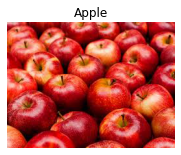

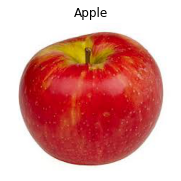

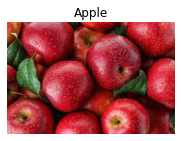

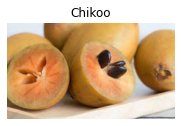

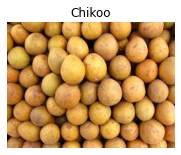

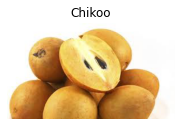

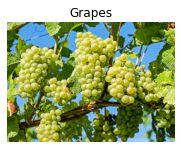

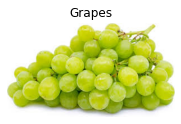

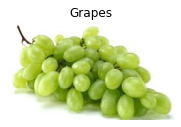

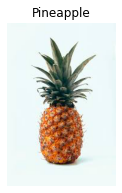

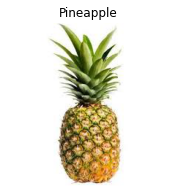

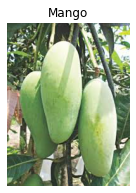

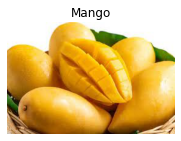

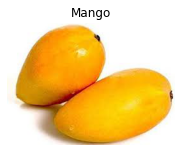

In [7]:
path = list(my_file.keys())
c = len(path)
os.makedirs("output",exist_ok=True)

counter = 0
for i in path:
  img = open_image(i)
  title = str(my_predictor(i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(counter))
  counter += 1

**Change Director back to '/content' folder.**

In [8]:
%cd /content

/content


# Downloading random images and make a video with their prediction result on them.

**Downloading 10 images per class using ```bing-image-downloader```.**

Directory Struture: 
```
/content
  /test_data
      /Fruit_name
          /Image_No.jpg
```

In [9]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
fruits = ['Mango', 'Apple', 'Banana', 'Pomegranate', 'Watermelon', 'Strawberry', 'Chikoo', 'Grapes', 'Guava', 'Pineapple']
for fruit in fruits:
  downloader.download(fruit, limit=10,  output_dir='/test_data', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.rd.com/wp-content/uploads/2018/01/The-weird-reason-that-mango-makes-your-mouth-itch_548103076-Darren-Tierney.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-YV4OFTjuVLw/UYNTXuBgspI/AAAAAAAAI-I/0UmqH_XwiwY/s1600/Mango-18+new1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Mangoes_pic.jpg/1200px-Mangoes_pic.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.americanbazaaronline.com/wp-content/uploads/2019/04/Indian-mangoes-in-the-US.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://thepennywisemama.com/wp-content/uploads/2013/10/Beauty2-830x1024.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://static.independent.co.uk/s3fs-public/thumbnails/image/2014/07/24/13/97755472.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://img.thr

**Storing the path of all the images (with names) in a list.**

Here list is suffled so that the possiblity of comming two pics of same type decreases,

In [10]:
all_images=[]
for fruit in fruits: 
  images = os.listdir("/content/test_data/"+fruit)
  for image in images:
    im = "/content/test_data/"+fruit+"/"+image
    all_images.append(im)
import random
random.shuffle(all_images)

# Making Video

**Here all the images are opened one by one from the list generated above. Also the result class of each image (i.e name of fruit shown in image). Then the result text will be shown on the upper left cornor of the image. Also images are resized so that all the images can be on same size in whole video. Images are saved in 'test_result' folder after completion of mentioned task.**

In [11]:
import cv2
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in all_images:
  img=cv2.imread(test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img=cv2.resize(img, (600, 600))
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

**Code for Setting Framerate and other important parameter for the video we will generate. Video will be generated by using all the images save above in 'test_result' folder.**

In [12]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

**Installing Kora and importing upload_public function which will be used to gererate a public URL of the video.**

In [13]:
!pip install -U kora
from kora.drive import upload_public

**Generating a public url of generated video so that it can be played in browser as well.**

In [14]:
url = upload_public('my_final_output.mp4')
print(url)

https://drive.google.com/uc?id=1sAa-_Wj2hs9Fk-KuDycFXm_dzoYSNCYA


**Playing the created video in Colab.**

In [19]:
from IPython.display import HTML
HTML(f"""<video src={url} width=400 controls/>""")

#We have done with our third and last notebook of fruits-classification.